## Create WaterFrame object from ERDDAP

Demo of usage of the method `from_erddap` that simplifies the data request.

In this first demostration, we collect data from the dataset "SBE 37 CTD Data" that is hosted in the ERDDAP Server:
http://erddap.emso.eu/erddap/tabledap/SBE37_cb46_2bc4_0b4f.html

The `from_erddap` method, receives the following parameters

```
    Parameters
    ----------
    
        server     : The ERDDAP server URL        
        dataset_id : The dataset id to query
        
    Optional Parameters
    -------------------
    
        variables  : List of variables to get from ERDDAP server, it can be comma 
                    separated string or a list.
        constraints : Query constraints to appy to the ERDDAP query, this can be 
                      list or dictionary.
        read_csv_kwargs : Dictionary with the parameters to pass to the read_csv 
                          function that converts the ERDDAP response to pandas 
                          DataFrame
        auth : Tupple with username and password to authenticate to a protected ERDDAP server.
```

This method uses the erddap-python library to make the metadata, and data requests, in this method we assume that the dataset is a Tabledap Dataset, and only use ERDDAP constraints to build the query.  

A WaterFrame object is returned with the data property with the DataFrame result of the query (With the time variable as index, if it's available). 

ERDDAP offers "server side functions" to affect the results (orderBy, orderByClosest, orderByMean, etc) this functionality is not currently accesible thru the `from_erddap` method.

In [15]:
from mooda.input import from_erddap

emso_erddap_url = 'http://erddap.emso.eu/erddap'
dataset_id = 'SBE37_cb46_2bc4_0b4f'

wf = from_erddap(emso_erddap_url, 
                 dataset_id,
                 constraints=[ {'time>=' : '2017-12-01T00:00:00Z'} , { 'time<=' : '2017-12-05T07:31:41Z' } ])

wf

Memory usage: 2.822 MBytes
Parameters:
  - temperature: sea_water_temperature (degC)
    - Min value: 15.9684
      - DEPTH: 0
      - TIME: 2017-12-04 15:32:41+00:00
    - Max value: 17.2243
      - DEPTH: 0
      - TIME: 2017-12-01 17:46:21+00:00
    - Mean value: 16.454416221005154
  - conductivity: sea_water_eletrical_conductivity (mS/cm)
    - Min value: 46.156
      - DEPTH: 0
      - TIME: 2017-12-04 16:21:01+00:00
    - Max value: 47.7819
      - DEPTH: 0
      - TIME: 2017-12-01 17:46:21+00:00
    - Mean value: 46.78902073131443
  - pressure: sea_water_pressure (dbar)
    - Min value: 18.692
      - DEPTH: 0
      - TIME: 2017-12-03 08:43:41+00:00
    - Max value: 20.316
      - DEPTH: 0
      - TIME: 2017-12-03 12:59:21+00:00
    - Mean value: 19.419538606099653
  - salinity: sea_water_salinity (PSU)
    - Min value: 36.9447
      - DEPTH: 0
      - TIME: 2017-12-05 05:08:41+00:00
    - Max value: 37.4545
      - DEPTH: 0
      - TIME: 2017-12-02 15:54:01+00:00
    - Mean value: 37.1520910008591
  - sound_velocity: speed_of_sound_in_seawater (m/s)
    - Min value: 1512.376
      - DEPTH: 0
      - TIME: 2017-12-04 15:33:41+00:00
    - Max value: 1516.474
      - DEPTH: 0
      - TIME: 2017-12-01 17:46:21+00:00
    - Mean value: 1513.9787284149484
  - pH: sea_water_pH (dmless)
    - Parameter without values.

In [16]:
from pprint import pprint 

pprint(wf.vocabulary)

OrderedDict([('time',
              {'_CoordinateAxisType': 'Time',
               '_dataType': 'double',
               'actual_range': (cftime.DatetimeGregorian(2009, 5, 29, 18, 35, 42, 0),
                                cftime.DatetimeGregorian(2017, 12, 5, 7, 31, 41, 0)),
               'axis': 'T',
               'ioos_category': 'Time',
               'long_name': 'Date/Time',
               'source_name': 'Date/Time',
               'standard_name': 'time',
               'time_origin': '01-JAN-1970 00:00:00',
               'time_precision': '1970-01-01T00:00:00Z',
               'units': 'seconds since 1970-01-01T00:00:00Z'}),
             ('temperature',
              {'_dataType': 'float',
               'actual_range': (11.7101, 27.1452),
               'ioos_category': 'Temperature',
               'long_name': 'sea_water_temperature',
               'units': 'degC'}),
             ('conductivity',
              {'_dataType': 'float',
               'actual_range': (29.39

<AxesSubplot:xlabel='Date', ylabel='dbar'>

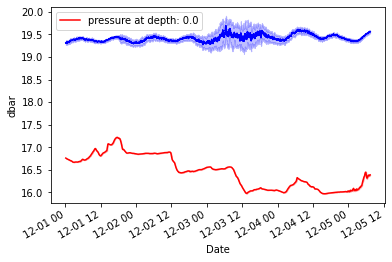

In [22]:
# WaterFrame normal usage

# This method requieres you to specify color list, otherwise it won't work
wf.plot_timeseries(parameters_to_plot=['temperature', 'pressure'], color=['r','b'])


## Demo 2 of from_errddap method

Sample of types of arguments accepted, powered by the erddap-python library

In [9]:
import datetime as dt 

variables = ['time', 'pressure'] 
# datetime format can be used for all time constraints
timemin = 'max(time)-7days'

# ERDDAP constraint keywords are accepted
# Refer to https://coastwatch.pfeg.noaa.gov/erddap/tabledap/documentation.html#query
timemax = 'max(time)' 

wf2 = from_erddap(emso_erddap_url, 
                  dataset_id,
                  constraints=[ {'time>=' : timemin} , { 'time<' : timemax } ])

wf2

Memory usage: 4.777 MBytes
Parameters:
  - temperature: sea_water_temperature (degC)
    - Min value: 15.6482
      - DEPTH: 0
      - TIME: 2017-11-29 03:59:41+00:00
    - Max value: 17.2243
      - DEPTH: 0
      - TIME: 2017-12-01 17:46:21+00:00
    - Mean value: 16.476562284939124
  - conductivity: sea_water_eletrical_conductivity (mS/cm)
    - Min value: 46.156
      - DEPTH: 0
      - TIME: 2017-12-04 16:21:01+00:00
    - Max value: 47.7819
      - DEPTH: 0
      - TIME: 2017-12-01 17:46:21+00:00
    - Mean value: 46.85571601045527
  - pressure: sea_water_pressure (dbar)
    - Min value: 18.692
      - DEPTH: 0
      - TIME: 2017-12-03 08:43:41+00:00
    - Max value: 20.316
      - DEPTH: 0
      - TIME: 2017-12-03 12:59:21+00:00
    - Mean value: 19.394086686077287
  - salinity: sea_water_salinity (PSU)
    - Min value: 36.9447
      - DEPTH: 0
      - TIME: 2017-12-05 05:08:41+00:00
    - Max value: 37.4545
      - DEPTH: 0
      - TIME: 2017-12-02 15:54:01+00:00
    - Mean value: 37.19123658350979
  - sound_velocity: speed_of_sound_in_seawater (m/s)
    - Min value: 1511.821
      - DEPTH: 0
      - TIME: 2017-11-29 03:59:41+00:00
    - Max value: 1516.474
      - DEPTH: 0
      - TIME: 2017-12-01 17:46:21+00:00
    - Mean value: 1514.0894155637905
  - pH: sea_water_pH (dmless)
    - Parameter without values.

## erddap-python request to WaterFrame object

This demo is to show how to get advantage of the server side functionality that ERDDAP offers, all that thru the erddap-python methods

In [10]:
from erddapClient import ERDDAP_Tabledap 

remote = ERDDAP_Tabledap(emso_erddap_url, dataset_id)

# Show the global metadata
remote.info


OrderedDict([('area', 'Mediterranean'),
             ('author', 'Universitat Politecnica de Catalunya (UPC)'),
             ('cdm_data_type', 'Other'),
             ('contact', 'enoc.martinez@upc.edu'),
             ('Conventions', 'COARDS, CF-1.6, ACDD-1.3, NCCSV-1.0'),
             ('defaultGraphQuery',
              'time%2Ctemperature%2C&time>=2017-11-29T00%3A00%3A00Z&time<=2017-12-06T00%3A00%3A00Z&.draw=lines&.marker=5|5&.color=0x000000&.colorBar=|||||&.bgColor=0xffccccff'),
             ('geospatial_lat_max', '41.18212'),
             ('geospatial_lat_min', '41.18212'),
             ('geospatial_lon_max', '1.75257'),
             ('geospatial_lon_min', '1.75257'),
             ('infoUrl', 'http://www.obsea.es'),
             ('institution',
              'SARTI Research Group. Electronics Dept. Universitat Politecnica de Catalunya (UPC)'),
             ('institution_edmo_code', '2150'),
             ('institution_references',
              'http://www.obsea.es/, http://cdsarti.or

In [11]:
# Show the variables metadata, vocabulary equivalent in WaterFrame
remote.variables

OrderedDict([('time',
              {'_dataType': 'double',
               '_CoordinateAxisType': 'Time',
               'actual_range': (cftime.DatetimeGregorian(2009, 5, 29, 18, 35, 42, 0),
                cftime.DatetimeGregorian(2017, 12, 5, 7, 31, 41, 0)),
               'axis': 'T',
               'ioos_category': 'Time',
               'long_name': 'Date/Time',
               'source_name': 'Date/Time',
               'standard_name': 'time',
               'time_origin': '01-JAN-1970 00:00:00',
               'time_precision': '1970-01-01T00:00:00Z',
               'units': 'seconds since 1970-01-01T00:00:00Z'}),
             ('temperature',
              {'_dataType': 'float',
               'actual_range': (11.7101, 27.1452),
               'ioos_category': 'Temperature',
               'long_name': 'sea_water_temperature',
               'units': 'degC'}),
             ('conductivity',
              {'_dataType': 'float',
               'actual_range': (29.3952, 59.5073),
  

In [12]:
# Make some data request of daily mean values
# 
# This request is asking erddap to deliver the data in daily means,
# it can take a while..

variables = ['time', 'pressure', 'temperature', 'salinity']
remote.clearQuery()

df = (remote.setResultVariables(variables)
            .addConstraint({'time>=' : dt.datetime(2013,1,1)})
            .addConstraint({'time<=' : 'max(time)'})
            .orderByMean('time/1day')  # Request a server side operation
            .getDataFrame(header=0, names=variables, parse_dates=True, index_col='time')
     )
df

,pressure,temperature,salinity
time,,,
2013-04-10 00:00:00+00:00,19.452881,12.741023,37.943239
2013-04-11 00:00:00+00:00,19.436894,12.971672,37.945033
2013-04-12 00:00:00+00:00,19.431021,12.826318,37.922738
2013-04-13 00:00:00+00:00,19.441862,12.928260,37.925933
2013-04-14 00:00:00+00:00,19.419134,12.956201,37.914295
...,...,...,...
2017-12-01 00:00:00+00:00,19.373599,16.874540,37.157962
2017-12-02 00:00:00+00:00,19.385518,16.684279,37.298129
2017-12-03 00:00:00+00:00,19.452079,16.263324,37.157068


In [13]:
# Now, create the WaterFrame object from the ERDDAP_Tabledap instance
import mooda as md

# Make the WaterFrame
wf = md.WaterFrame()
wf.data = df  # Pending.., rename the time, and depth coordinate variables
wf.metadata = remote.info
# Just include in the vocabulary, the variables requested
wf.vocabulary = { key:value for key, value in remote.variables.items() if key in list(df.columns) }

wf

,pressure,temperature,salinity
time,,,
2013-04-10 00:00:00+00:00,19.452881,12.741023,37.943239
2013-04-11 00:00:00+00:00,19.436894,12.971672,37.945033
2013-04-12 00:00:00+00:00,19.431021,12.826318,37.922738
2013-04-13 00:00:00+00:00,19.441862,12.928260,37.925933
2013-04-14 00:00:00+00:00,19.419134,12.956201,37.914295
...,...,...,...
2017-12-01 00:00:00+00:00,19.373599,16.874540,37.157962
2017-12-02 00:00:00+00:00,19.385518,16.684279,37.298129
2017-12-03 00:00:00+00:00,19.452079,16.263324,37.157068
